<a href="https://colab.research.google.com/github/bdts1547/CS112.L21.KHTN_N11/blob/main/Seminar/Lego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đề bài

Bạn có 4 loại khối lego có kích thước như (chiều sâu x chiều cao x chiều rộng):

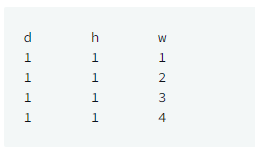

Sử dụng các khối này, ta tạo ra bức tường có chiều cao n và chiều rộng m. đặc điểm của tường là: 

- Không có lỗ.

- Không có vết đứt dọc trên tất cả các hàng.

- Viên gạch đặt ngang.

Có bao nhiêu cách xây tường? 




Mô tả chức năng

legoBlocks có (các) tham số sau:

  - int n: chiều cao của bức tường
  - int m: chiều rộng của bức tường
Trả về
  int: số mô-đun cấu tạo tường hợp lệ ($10^9 +7$)

Định dạng đầu vào

 - Mỗi cái tiếp theo  dòng chứa hai số nguyên được phân tách bằng dấu cách n và m .

Ràng buộc:

- 1<=n, m<=1000





# 1. Abstraction

Cho một bức tường có chiều cao N và chiều rộng M.
+ Tính toàn bộ số cách sắp xếp rồi trừ đi số cách sắp xếp sai

# 2. Decomposition

Sau khi Abstraction thì ta thấy có thể chia bài toán thành 2 bài toán con như sau:

1.   Tính tất cả số cách xếp.(4 loại thành 1 hàng ngang)

    + Tính số cách xếp trên từng hàng. Sau đó tính cách xếp toàn bộ dựa trên các hàng đã tính.  
2.   Tính số cách xếp sai.(Có một vết nứt dọc trên tất cả hàng gạch)

Đáp án: (1) - (2)


# 3. Pattern Recognition

Bài toán đếm: đếm số cách chọn 4 viên gạch xếp vào một bức tường sao cho thỏa mãn yêu cầu đề bài

# 4. Algorithm Design

Từ những mối quan hệ mà ta đã decomposition dẫn đến phương pháp thiết kế như này:

- Gọi $f[i]$ là số cách chọn ứng với chiều dài i.(tính luôn cả cách sai)

- Số cách chọn hình có kích thước N * i là: $g[i]$ = $f[i]^n$ (tính luôn cả cách sai)

- Giả sử ta đã đặt được khối (1 x k) thì phần còn lại cần đặt có độ dài (i - k) vì vậy phần còn lại sẽ có cách chọn là $f[i-k]$.

- Vậy: 
    
    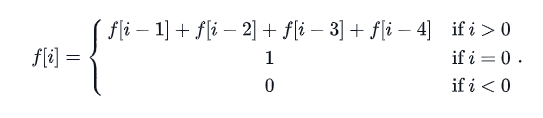

- Ta có $g[m]$ là số cách chọn với kích thước N * M, và để loại bỏ các trường hợp không chắc chắn:
  
    + Ta giả sử h[i] là số cách chọn thỏa yêu cầu bài toán kích thước N * i, khi đó số cách chọn theo yêu cầu đề ra là:

  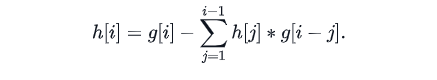

- Số cách xây bức tường là: $h[m]$. 

# 5. Độ phức tạp của thuật toán.

O(nlogn +$m^2$)

# 6. Programing

In [ ]:
import sys
import time


MOD = 1000000007
# tính mũ n
# nếu đã tồn tại trong memoize trả về còn không thì tính
def cal_power(base, n):
    if n <= 2:
        return (base ** n) % MOD
    else:
        result = (power(base, n // 2) ** 2)
        if n % 2 == 1:
            result = (result * base)
        return result % MOD
    
memoize = {}
def power(base, n):    
    if  (memoize not in (base,n)):
        memoize[(base, n)] = cal_power(base, n)
    return memoize[(base, n)]


    
# path = "/content/drive/MyDrive/UIT_K14/Semester_4/PT_TKTT/Test/lego2.in"
path = "/content/drive/MyDrive/UIT_K14/Semester_4/PT_TKTT/Seminar_Practice/inputLego.txt"
with open(path) as f:
    content = f.readlines()

T = int(content[0])

for k in range(1, T + 1):
    # [N, M] = map(int, input().split());
    N, M = map(int, content[k].split())

    f = [0 for x in range(0, M+1)]
    h = [0 for x in range(0, M+1)]
    g = [0 for x in range(0, M+1)]
    f[0] = 1

    # ST = time.time()

    for i in range(1, M+1):
        for j in range(1,5):
            if (i - j >= 0):
                f[i] = f[i] + f[i-j]; # tính số cách chọn với kích thước 1*i
                g[i] = power(f[i], N) # tính số cách chọn kích thước n*i
                # g[i] = f[i] ** N
                # print(f)
                # print(g)


    h[1] = 1
    for i in range (1, M+1):
        h[i] = g[i] 
        temp = 0
        for j in range(1, i):            
            temp = temp +(h[j] * g[i-j]) % MOD # số cách mà tường không vững chắc từ 1 tới i
            #print(temp)
            h[i] = (g[i] - temp) % MOD # số cách xây tường  với kích thước n*i 
            
    # ET = time.time()

    print (h[M])

    # print('Time: ', ET - ST , 'sec')

# 1000 x 1000: 324s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
